Se analizaran los datos de Grupo Financiero Inbursa, desde el 7-02-2001 hasta 4-02-2021

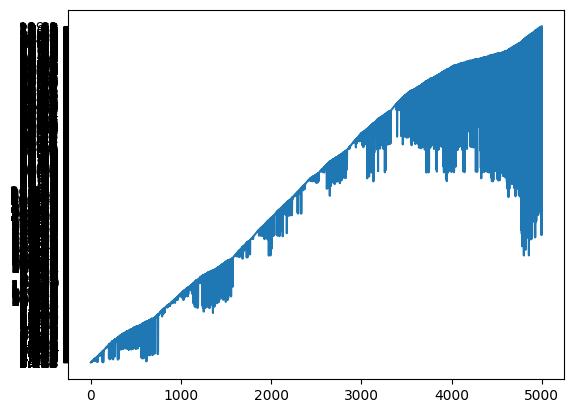

In [1]:
import torch, pywt, csv, numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import reader1 as rd
import utilerias as utls
from NARNN import NARNN 

# Abrir el archivo CSV en modo lectura
#Grupo Financiero Inbursa
cierre = rd.leer_archivo('cierre.csv')

x = np.arange(1, 5000)

# Crear un gráfico de línea con los valores de x, y
plt.plot(x, cierre)

# Mostrar el gráfico
plt.show()

#Eleccion de Mother Wavelet

Se elige las mother wavelets dependiendo de las caracteristicas de la serie de tiempo que se va a analizar. Para series que impliquen cambios no periodicos y repentinos es recomendable usar Haar ya que responde bien a estos cambios repentinos.

Se elige bior3.5 debido a las caracteristicas de las fluctuaciones entre periodos con altas cantidades de inversiones y periodos en los que no.

En general, el mother wavelet debe de ser una funcion de las caracteristicas de la serie original para que esta pueda ser reconstruida o analizada 

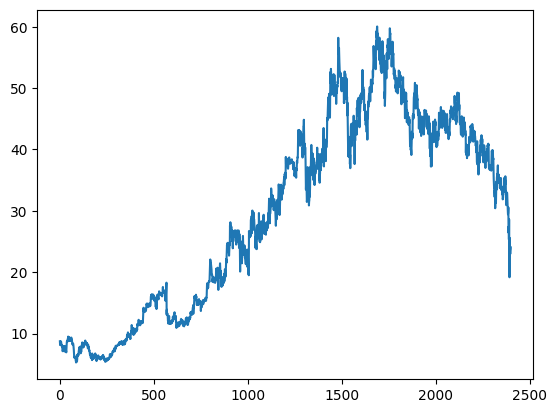

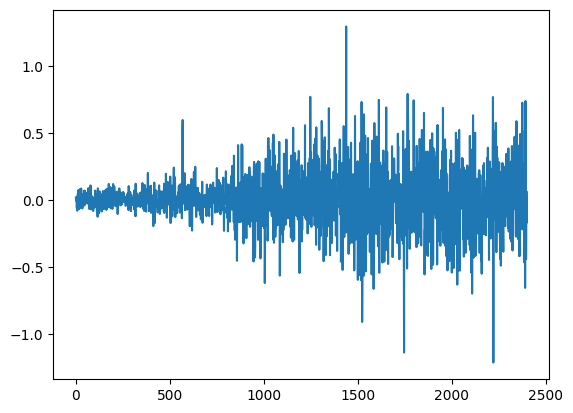

In [2]:
#Se descompone la lista de precios de cierre del intervalo mencionado anteriormente a partir de la dwt con la función bior3.5
(cA, cD) = pywt.dwt(cierre.tolist(), 'bior3.5')

# cA.size = 2505, cD.size = 2505
plt.plot(x[:2400], cA[:2400])
plt.show()

plt.plot(x[:2400], cD[:2400])
plt.show()

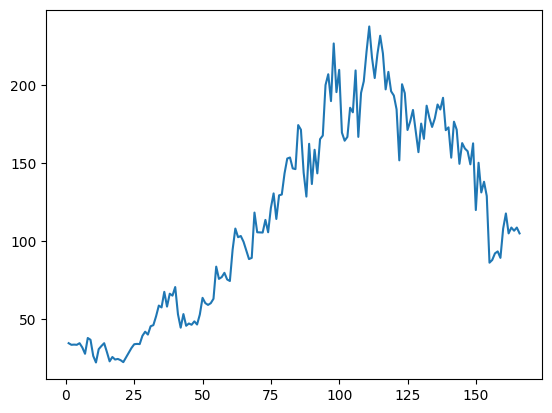

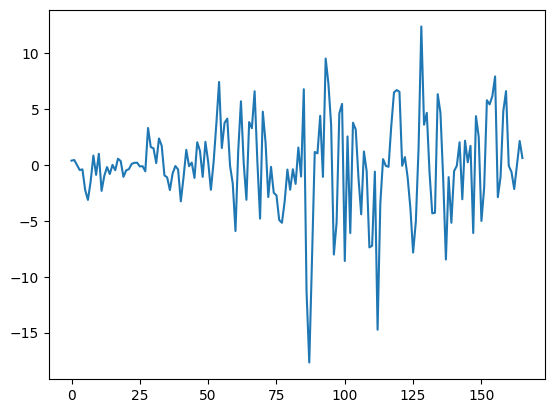

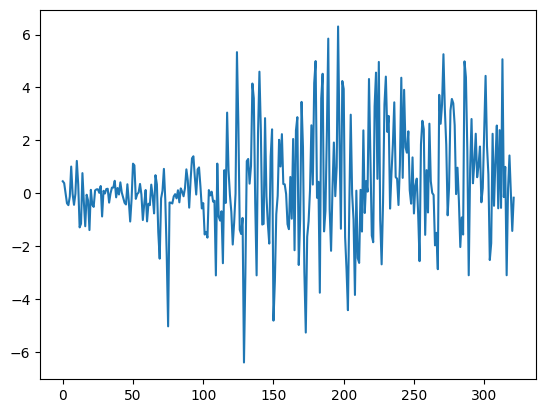

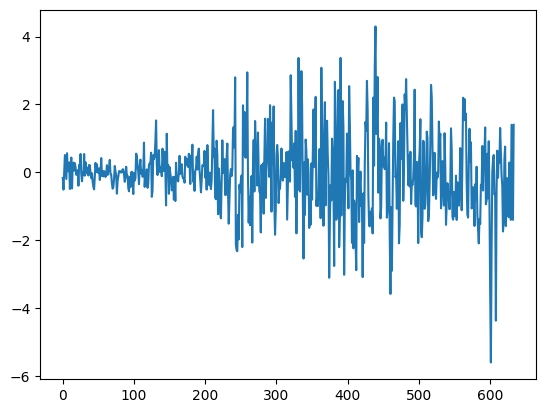

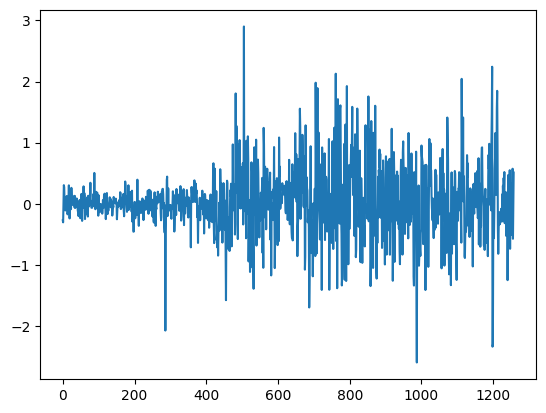

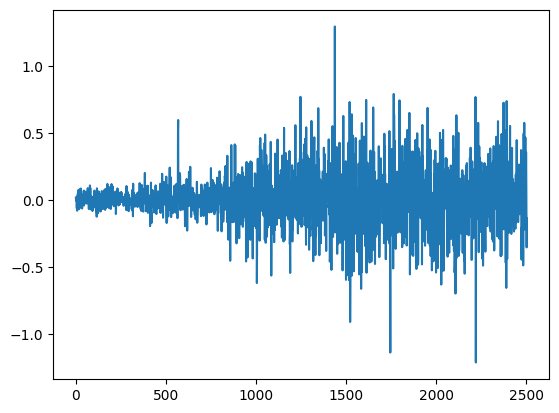

In [3]:
#Se realiza el proceso 5 veces
coeffs = pywt.wavedec(cierre, 'bior3.5', level=5)

cA = coeffs[0]
plt.plot(x[:166], cA)
plt.show()

cD_1 = coeffs[1]
cD_2 = coeffs[2]
cD_3 = coeffs[3]
cD_4 = coeffs[4]
cD_5 = coeffs[5]
plt.plot(range(166), cD_1)
plt.show()

plt.plot(range(322), cD_2)
plt.show()

plt.plot(range(634), cD_3)
plt.show()

plt.plot(range(1258), cD_4)
plt.show()

plt.plot(range(2505), cD_5)
plt.show()


In [4]:
A5=coeffs[0]#coeficientes de analisis
D1=coeffs[1]#coeficientes de detalle
D2=coeffs[2]
D3=coeffs[3]
D4=coeffs[4]
D5=coeffs[5]

#Se normalizan cada uno de los elementos de los vectores contenidos en las descomposicion de la serie de tiempo original
coeffs_n = [utls.normalizar(vect) for vect in coeffs]

#Estos 6 arreglos representan la descomposición de la señal original. Se tendrán que armar 6 redes que predigan cada una de estas
#componentes, Las entradas correspondientes a cada una son las 8 semanas anteriores para calcular la novena


entrenamiento,prueba,validacion = utls.generar_conjuntos(coeffs_n,False,5)
#la de abajo es una prueba
#entrenamiento,prueba,validacion = utls.generar_conjuntos([[1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10]],False,1)

In [5]:
red_A1 = NARNN(input_dim=8, hidden_dim=0, output_dim=1, num_layers=0)
red_D1 = NARNN(input_dim=8, hidden_dim=0, output_dim=1, num_layers=0)
red_D2 = NARNN(input_dim=8, hidden_dim=0, output_dim=1, num_layers=0)
red_D3 = NARNN(input_dim=8, hidden_dim=0, output_dim=1, num_layers=0)
red_D4 = NARNN(input_dim=8, hidden_dim=0, output_dim=1, num_layers=0)
red_D5 = NARNN(input_dim=8, hidden_dim=0, output_dim=1, num_layers=0)


#entradas ya procesadas
entradas_8_1 = [[],[],[],[],[],[]]

# A cada uno de los conjuntos de entrenamiento se les da una forma de entrada en especifico,
# que es un arreglo de 8 y uno de un solo elemento para representar la salida
for e in range(6):
    entradas_8_1[e] = utls.forma_entrada(entrenamiento[e],9)
    
#la forma de la entrada de la red neuronal
print(entradas_8_1[0])
print(len(entradas_8_1[0]))
#salida = red(entradas_8_1[0][:, :8])
#print(salida)


[tensor([[0.0574, 0.0526, 0.0532, 0.0526, 0.0574, 0.0446, 0.0259, 0.0728, 0.0675]]), tensor([[0.0194, 0.0000, 0.0397, 0.0491, 0.0573, 0.0311, 0.0034, 0.0163, 0.0088]]), tensor([[0.0105, 0.0069, 0.0010, 0.0149, 0.0291, 0.0432, 0.0543, 0.0553, 0.0548]]), tensor([[0.0794, 0.0916, 0.0831, 0.1078, 0.1111, 0.1376, 0.1693, 0.1638, 0.2103]]), tensor([[0.1663, 0.2047, 0.1990, 0.2246, 0.1437, 0.1035, 0.1441, 0.1093, 0.1160]]), tensor([[0.1122, 0.1224, 0.1130, 0.1426, 0.1924, 0.1768, 0.1713, 0.1764, 0.1895]]), tensor([[0.2852, 0.2488, 0.2540, 0.2668, 0.2471, 0.2425, 0.3356, 0.3986, 0.3729]]), tensor([[0.3764, 0.3593, 0.3339, 0.3078, 0.3113, 0.4461, 0.3875, 0.3870, 0.3867]]), tensor([[0.4244, 0.3876, 0.4598, 0.5031, 0.4271, 0.4974, 0.4999, 0.5626, 0.6069]]), tensor([[0.6101, 0.5776, 0.5754, 0.7065, 0.6927, 0.5647, 0.4937, 0.6509, 0.5311]]), tensor([[0.6330, 0.5629, 0.6647, 0.6754, 0.8258, 0.8579, 0.7779, 0.9494, 0.8046]]), tensor([[0.8709, 0.6840, 0.6600, 0.6713, 0.7581, 0.7445, 0.8692, 0.6714, 0.

In [6]:


#cada entrenamiento tarda aproximadamente 5 min con 1000 epocas
#params = red_A1.parameters()
utls.entrena(red_A1,0,entradas_8_1,10000)
#utls.entrena(entradas_8_1,red_D1,1)
#utls.entrena(entradas_8_1,red_D2,2)
#utls.entrena(entradas_8_1,red_D3,3)
#utls.entrena(entradas_8_1,red_D4,4)
#utls.entrena(entradas_8_1,red_D5,5)

C:\Users\maliera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [7]:
pruebas_ordenadas = []

for c_pruebas in entrenamiento:#prueba
    pruebas_ordenadas.append(utls.forma_entrada(c_pruebas,9))#prueba[0] es el conjunto de prueba para cada red
#pruebas = forma_entrada(prueba[0],9)#prueba[0] es el conjunto de prueba para A1


print(utls.genera_prediccion(pruebas_ordenadas[0],red_A1).detach().numpy().tolist()[0])
#print(entrenamiento[0])


[0.0574190653860569, 0.052611541002988815, 0.0532059483230114, 0.052611541002988815, 0.0574190653860569, 0.044645149260759354, 0.025907643139362335, 0.07284803688526154, -0.0004803799092769623, 0.01941833645105362, 0.0, 0.03965595364570618, 0.049091048538684845, 0.05734839290380478, 0.03112872876226902, 0.0033671660348773003, 0.016343194991350174, -0.05778476223349571, 0.01054145023226738, 0.006914489436894655, 0.0009882367448881269, 0.014940254390239716, 0.029081333428621292, 0.04320499300956726, 0.05430448427796364, 0.055290233343839645, 0.016889844089746475, 0.07936684787273407, 0.09162968397140503, 0.08309555798768997, 0.10783642530441284, 0.11108877509832382, 0.13764195144176483, 0.1693161278963089, 0.16383223235607147, 0.20925357937812805, 0.1662662774324417, 0.2046717256307602, 0.19898948073387146, 0.22455310821533203, 0.14367058873176575, 0.10354813933372498, 0.1440543234348297, 0.1093030720949173, 0.1293947994709015, 0.11223585903644562, 0.12235654890537262, 0.1130238547921180

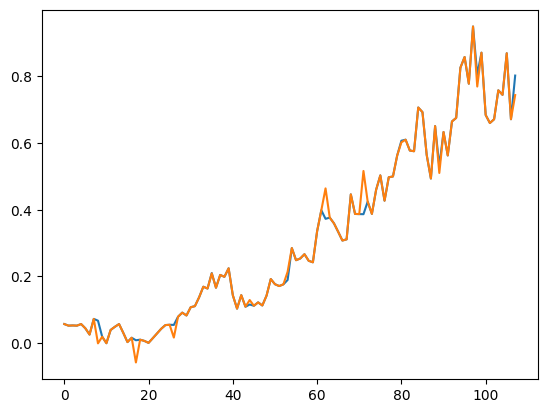

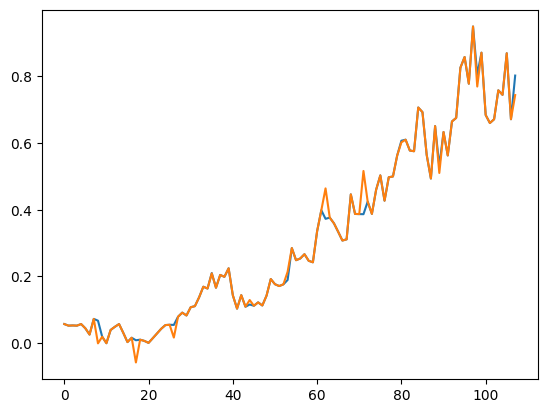

[0.81280927 0.86488167 0.80708521 0.79440233 0.75323313 0.60158617
 0.82804043 0.80158034 0.69185568 0.71781569 0.75158265 0.689009
 0.6259552  0.71098042 0.66563454 0.76420858 0.72824393 0.70097231
 0.72644053 0.76779128 0.75298823 0.78775683 0.6913776  0.69977333
 0.60954454 0.7166723  0.69280521 0.59122007 0.65289663 0.63678634
 0.62863523 0.5897861  0.65217408 0.45366899 0.5944051  0.50599046
 0.53791292 0.49539961 0.29700349 0.30497147 0.32464658 0.33062864
 0.31132227 0.39851368 0.44343923 0.38416685 0.40155024 0.392112
 0.40155024 0.38416685]


In [8]:
plt.plot(range(108), entrenamiento[0][:-8])
plt.plot(range(108), utls.genera_prediccion(pruebas_ordenadas[0],red_A1).detach().numpy().tolist()[0])
plt.show()

plt.plot(range(108), entrenamiento[0][:-8])
plt.plot(range(108), [utls.desnormalizar(vect) for vect in utls.genera_prediccion(pruebas_ordenadas[0],red_A1).detach().numpy().tolist()[0]])
# Mostrar el gráfico
plt.show()
#investigar bien la dwt y predecir la red con los corrimientos de 1, usando los datos que predice o solo los datos que le doy
#Lo que hace es generar una prediccion cada noveno día, con los datos que ya se le dan del entrenamiento, es preciso ajustar los parametros hasta que ambas series
#sean iguales
print(prueba[0])

116
>>>>>>i: 0
Nueva Entrada:
tensor([0.0574, 0.0526, 0.0532, 0.0526, 0.0574, 0.0446, 0.0259, 0.0728])
Prediction: -0.0004803799092769623
[ 0.05261154  0.05320595  0.05261154  0.05741907  0.04464515  0.02590764
  0.07284804 -0.00048038]
>>>>>>i: 1
Nueva Entrada:
tensor([ 0.0526,  0.0532,  0.0526,  0.0574,  0.0446,  0.0259,  0.0728, -0.0005])
Prediction: -0.0013558529317378998
[ 0.05320595  0.05261154  0.05741907  0.04464515  0.02590764  0.07284804
 -0.00048038 -0.00135585]
>>>>>>i: 2
Nueva Entrada:
tensor([ 0.0532,  0.0526,  0.0574,  0.0446,  0.0259,  0.0728, -0.0005, -0.0014])
Prediction: -0.05989047512412071
[ 0.05261154  0.05741907  0.04464515  0.02590764  0.07284804 -0.00048038
 -0.00135585 -0.05989048]
>>>>>>i: 3
Nueva Entrada:
tensor([ 0.0526,  0.0574,  0.0446,  0.0259,  0.0728, -0.0005, -0.0014, -0.0599])
Prediction: -0.13052532076835632
[ 0.05741907  0.04464515  0.02590764  0.07284804 -0.00048038 -0.00135585
 -0.05989048 -0.13052532]
>>>>>>i: 4
Nueva Entrada:
tensor([ 0.0574,  

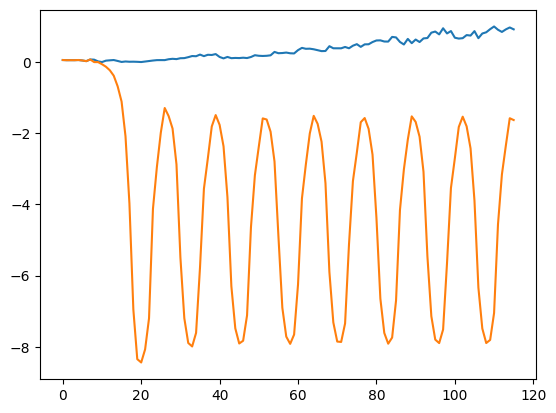

In [9]:
salida = utls.genera_salida(entrenamiento[0],8,red_A1)
plt.plot(range(116), entrenamiento[0])
plt.plot(range(116), salida)
plt.show()


In [10]:
from NARNN import NARNN
red_A2 = NARNN(input_dim=8, hidden_dim=0, output_dim=1, num_layers=0)